In [1]:
#import Data_Processor as dp
import os
import time
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import re
import matplotlib

from nltk.stem.snowball import SnowballStemmer
import nltk
import gensim
import spacy

import matplotlib.cm as cm

stemmer = SnowballStemmer("english")
nlp = spacy.load("en_core_web_sm")

In [2]:
from tool import *
# unique(x)
# find_kol(data,rank)
# unique_time(data)
# exforeign(data)
# duplicate(data)
# remove_link(data)
# remove_sign(data)
# total_clean(indata)
# toword(data,stem=False,stop=True)
# get_words(url), pos, neg, opinion
# debug2(sentence)
# month(start,end)
# search(data,keywords)
# LDA(data, topics, words,otherwords)
# NMF(data,topics,words,otherwords)
# double(data,keyword_list)
# trend(data,hint,keyword_list)
# all_trend(metadata,hint,keyword_list)
# show(entity,month,keyword) # for all_trend
# classify(monthdata)

In [3]:
def dsearch(data,have,nhave):
    result=[]
    for i in data:
        s=0
        for j in have:
            if j in i['text'].lower():
                s=1
        for j in nhave:
            if j in i['text'].lower():
                s=0
        if s:
            result.append(i)
    return result

def lsum(l):
    if type(l[0])!=list:
        return l
    result=[]
    for i in l:
        result+=i
    return result

def mean(data):
    temp1,temp2=0,0
    for i in data:
        temp1+=i['positive']
        temp2+=i['negative']
    return temp1/max(len(data),1),temp2/max(len(data),1)

from wordcloud import WordCloud, STOPWORDS
def wordcloud(data,max_words=30,otherwords={},width = 500, height = 500):
    matplotlib.rcParams['figure.dpi'] = 100
    wordcloud = WordCloud(width = width, height = height, max_words=max_words,
                background_color ='white',
                stopwords = STOPWORDS.union(otherwords)).generate(' '.join([i['text'].lower() for i in data]))
    plt.axis('off')
    plt.imshow(wordcloud)

In [4]:
msdata=[]
m=month('2017-06','2020-05')
root_path=os.getcwd()
temp=os.listdir(root_path+'\\MS_weekly')
'''
for i in temp:
    msdata.append(total_clean(json.load(open(root_path+'\\MS_weekly\\'+i)))[:-1])
period=[]
for i in msdata:
    period+=i
'''

"\nfor i in temp:\n    msdata.append(total_clean(json.load(open(root_path+'\\MS_weekly\\'+i)))[:-1])\nperiod=[]\nfor i in msdata:\n    period+=i\n"

In [66]:
def read_data(path):
    structure=list(os.walk(path))
    summary=[]
    for i in structure:
        if not i[1]:
            temp=[]
            for j in i[2]:
                #print(i[0]+'\\'+j)
                #temp.append([(x['text'],x['positive'],x['negative']) for x in anothertemp])
                temp.append([{'text':x['text'],'positive':x['positive'],'negative':x['negative'],
                              'likes':x['likes'],'replies':x['replies'],'screen_name':x['screen_name'],
                              'tweet_url':x['tweet_url'],'retweets':x['retweets'],} for x in remove_rubbish(json.load(open(i[0]+'\\'+j))[:-1])])
            summary.append(temp)
    #return summary
    def lsum(list_):
        result=[]
        num=len(list_[0])
        for i in range(num):
            temp=[]
            for j in list_:
                temp+=j[i]
            result.append(temp)
        return result
    return lsum(summary)
category=os.listdir(root_path+'\\SentiStrength\\final')
metadata=[]
for i in category:
    metadata.append([])
    metadata[-1]=read_data(root_path+'\\SentiStrength\\final\\'+i)

In [6]:
def andsearch(data,keywords):
    result=[]
    for i in data:
        mark=1
        for j in keywords:
            if j not in i['text'].lower():
                mark=0
        if mark:
            result.append(i)
    return result

In [7]:
len(metadata)

4

## tweets

In [8]:
def metasearch(metadata,keywords=['']):
    result=[]
    for i in range(len(metadata)):
        result.append([])
        for j in range(len(metadata[0])):
            result[-1].append(search(metadata[i][j],keywords))
    return result
def metaratio(metadata,keywords=['']):
    temp=metasearch(metadata,keywords)
    result=[]
    for i in range(len(temp)):
        result.append(len(lsum(temp[i]))/len(lsum(metadata[i])))
    return result
def metafreq(metadata,keywords=['']):
    temp=metasearch(metadata,keywords)
    result=[]
    for i in range(len(temp)):
        result.append(len(lsum(temp[i])))
    return result
def metascore(metadata,keywords=[''],hint=0):
    temp=metasearch(metadata,keywords)
    result=[]
    for i in range(len(temp)):
        cnt=0
        for j in lsum(temp[i]):
            if hint==0 and j['positive']>=-1.5*j['negative']:
                cnt+=1
            elif hint==1 and 1.5*j['positive']<=-j['negative']:
                cnt+=1
        result.append(cnt/len(lsum(temp[i])))
    return result
def f(data):
    return len(set([i['screen_name'] for i in data]))

In [9]:
temp=list(os.walk(os.getcwd()+'\\SentiStrength\\final\\Discount Brokerage'))
discount=[]
for i in temp:
    if not i[1]:
        discount.append([])
        for j in i[2]:
            discount[-1].append(json.load(open(i[0]+'\\'+j))[:-1])
company=temp[0][1]
company

['Charles Schwab',
 'eTrade',
 'Fidelity',
 'InteractiveBrokers',
 'Robinhood',
 'TD Ameritrade',
 'Tradestation']

## fee

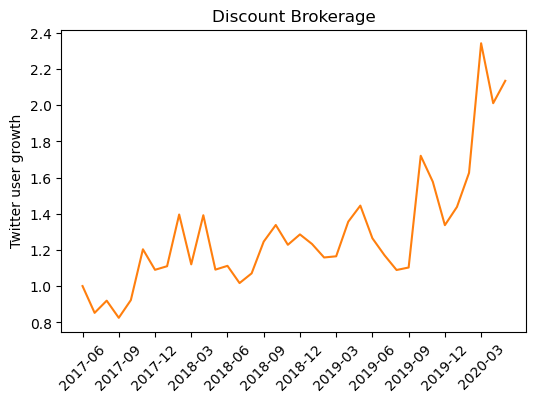

In [10]:
matplotlib.rcParams['figure.dpi']=100
result=[]
for i in metadata[1]:
    result.append(f(i))
fig,ax=plt.subplots()    
ax.plot(np.array(m),np.array(result)/result[0],color='C1')
ax.set_xticks(np.arange(36))
ax.set_xticklabels([i if x%3==0 else '' for x,i in enumerate(m)],rotation=45)
for t in ax.xaxis.get_ticklines():
    t.set_visible(False)
for t in ax.xaxis.get_ticklines()[::2][::3]:
    t.set_visible(True)
plt.ylabel('Twitter user growth')
plt.title('Discount Brokerage')
plt.show()

In [11]:
pos=[]
for i in metadata[1]:
    temp=0
    for j in i:
        if j['positive']>=-1.5*j['negative']:
            temp+=1
    pos.append(temp/len(i))

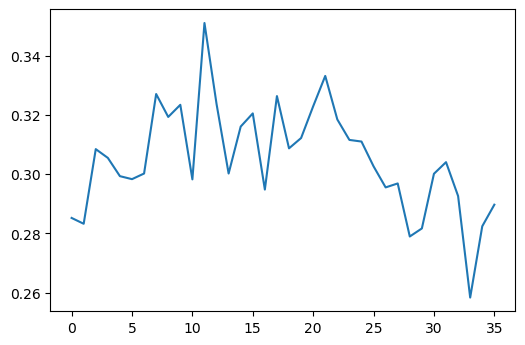

In [12]:
plt.plot(pos)

In [13]:
company

['Charles Schwab',
 'eTrade',
 'Fidelity',
 'InteractiveBrokers',
 'Robinhood',
 'TD Ameritrade',
 'Tradestation']

In [14]:
def likemean(data):
    total=len(data)
    cnt=0
    score=0
    for i in data:
        if i['likes']<=total/100:
            cnt+=1+i['likes']
            score+=(1+i['likes'])*i['positive']
        else:
            cnt+=1+total/100
            score+=(1+total/100)*i['positive']
    return score/max(1,cnt)

def replymean(data):
    total=len(data)
    cnt=0
    score=0
    for i in data:
        cnt+=1+i['replies']
        score+=(1+i['replies'])*i['positive']
    return score/max(1,cnt)

def mean(data):
    total=len(data)
    cnt=0
    score=0
    for i in data:
        cnt+=1
        score+=i['positive']
    return score/max(1,cnt)
def nmean(data):
    total=len(data)
    cnt=0
    score=0
    for i in data:
        cnt+=1
        score+=i['negative']
    return score/max(1,cnt)
def negratio(data):
    temp=0
    for i in data:
        if -i['negative']>=1.5*i['positive']:
            temp+=1
    return temp/max(len(data),1)
def posratio(data):
    temp=0
    for i in data:
        if i['positive']>=-i['negative']*1.5:
            temp+=1
    return temp/max(1,len(data))
def likenarrow(data):
    result=[]
    for i in data:
        if i['likes']:
            result.append(i)
    return result

In [15]:
text(search(metadata[0][-8],['commission ','commissions']))

17


[' PUBLIC SEMINAR in the Legal Profession Higher Education CUHKLaw CUHKofficial Gender Research Centre Equal Opportunities Commission IBAevents Mon  Nov pm GLC F Bank of America Tower Register here ',
 'BankofAmerica we are reporting this to OCC and Bank Commission You have one day to reimburse my wifes account regardless if your investigation',
 'But I havent paid commission in years with Merrill Lynch Bank of America deal So can I be down now LOL',
 'Hrmm CRFB Board members Repub Gov Bushs OMB former SecDef Bushs SS commission Wallstreeter IMF adviser Investment banker Corporate board member x Merrill Lynch executive President of HIAAthe list goes on Gee I wonder if this analysis is objective',
 'I invite Queen Elizabeth II The Duchess of Cornwall Camilla The Duchess of Cambridge Kate Middleton The Presidentelect European Commission Ursula Chancellor of Germany Angela Merkel Jing Ulrich from JP Morgan Margaret Ren from Merrill Lynch and Shannon Watts from USA',
 'I was an equity brok

In [16]:
metafreq(metadata,['commission ','commission'])

[643, 5622, 722, 43]

## commission comparison

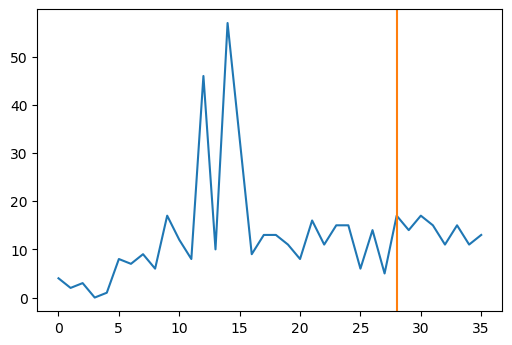

In [17]:
plt.plot([len(search(i,['commission ','commissions'])) for i in metadata[0]])
plt.axvline(28, label='pyplot vertical line',color='C1')

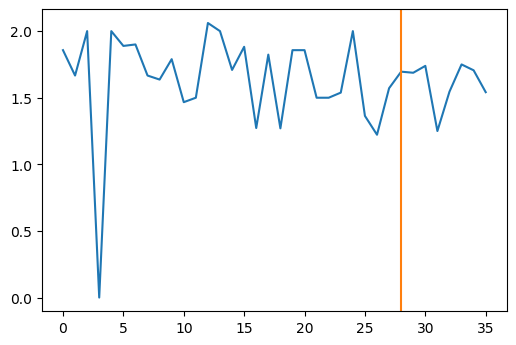

In [18]:
plt.plot([replymean(search(i,['commission ','commissions'])) for i in metadata[0]])
plt.axvline(28,label='pyplot vertical line',color='C1')

In [19]:
(search(metadata[0][12],['commission ','commissions']))

[{'text': 'Bank of America is considering allowing commissions on Merrill Lynch retirement accounts via markets',
  'positive': 2,
  'negative': -2,
  'likes': 0,
  'replies': 0,
  'screen_name': 'CCastroPagan',
  'tweet_url': '/CCastroPagan/status/1008782459117416449'},
 {'text': 'Merrill Lynch Reconsiders Commission Ban in Wake of Fiduciary Rule Demise ',
  'positive': 2,
  'negative': -2,
  'likes': 0,
  'replies': 0,
  'screen_name': 'TheDIWire',
  'tweet_url': '/TheDIWire/status/1008726196291620864'},
 {'text': 'Merrill Lynch reviewing ban on commissionspaying retirement accounts NEW YORK Reuters The head of Bank of America Corps Merrill Lynch on Friday said the firm is reconsidering an internal policy from  that banned REUTERS',
  'positive': 2,
  'negative': -2,
  'likes': 1,
  'replies': 0,
  'screen_name': 'FinanzLinksCom',
  'tweet_url': '/FinanzLinksCom/status/1007698770543312896'},
 {'text': 'MerrillLynch said fees on investment portfolios were best and only way to proceed 

In [20]:
text(search(metadata[0][14],['commission ','commissions']))

57


[' years after it moved to end commissions in retirement accounts Merrill Lynch says it will reverse course on Oct  ',
 'Are JPMorgans ZeroCommission Trades Really Free ',
 'Are you ladygaga aplusk TechCrunch KimGarst mozilla marismith mashable AmyPorterfield BarackObama USCPSC jeffbullas EUCommission OK with jpmorgan WellsFargo Citi usbank GIVING Your PERSONAL BANKING INFO ',
 'Are you ladygaga aplusk TechCrunch KimGarst mozilla marismith mashable AmyPorterfield BarackObama USCPSC jeffbullas EUCommission OK with jpmorgan WellsFargo Citi usbank GIVING Your PERSONAL BANKING INFO ',
 'BREAKING Merrill Lynch reverses policy on banning IRA commissions following death of DOL fiduciary rule ',
 'BREAKING Merrill Lynch reverses policy on banning IRA commissions following death of DOL fiduciary rule via newsfromIN',
 'BREAKING MerrillLynch BofAML Says Theyre Back Reintroduces Commissions in Retirement Accounts as of Oct  and Adds New PlainTalk Statements ',
 'Beast mode LouisianaStates respons

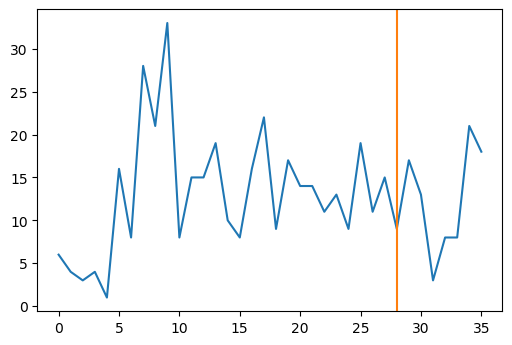

In [21]:
plt.plot([len(dsearch(i,['commission ','commissions'],['electoral commission'])) for i in metadata[2]])
plt.axvline(28, label='pyplot vertical line',color='C1')

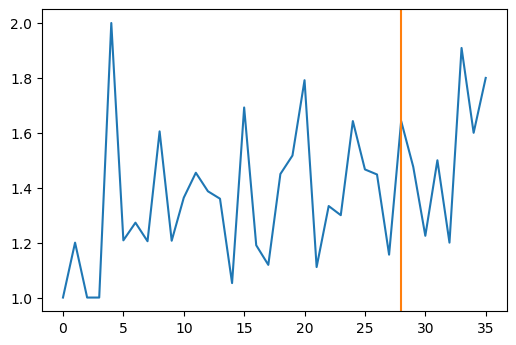

In [22]:
plt.plot([replymean(search(i,['commission ','commissions'])) for i in metadata[2]])
plt.axvline(28, label='pyplot vertical line',color='C1')

In [23]:
text(search(lsum(metadata[0][28:31]),['broker']))

174


[' Architect Lenny Curry goes on a with his boss Only thing is his calendar was blank and when he returned he didnt file exparte communications Who did he meet Like a NYC Utility Broker and JP Morgan and Morgan Stanley WJXTvic ',
 ' Chase said Wed that Chinas regulator has granted it the license to operate securities and futures businesses which means its China securities JV becomes the second broker controlled by a foreign company to get greenlighted in ',
 ' I have a main point to make but first I have to provide some back ground In  I was able to take a small amount of money trade stocks in a trading account This was a new concept at the time A large percentage of my assets were sitting in a Merrill Lynch brokerage',
 ' MerrillEdge Please unblock buying ETFs like NTSX SWAN AVDV AVUV and other excellent ETFs You allow X leveraged ETFs like UPRO TMF NUGT and even BOIL and KOLD X Nat gas longshort You are really forcing many of us to switch brokerages MerrillLynch',
 ' Newark New Jerse

In [24]:
text(search(lsum(metadata[2]),['advisory fee']))

8


['A very disturbing no brainer And they use Govt Bonds as a Risk Free Rate Scarily riskfree rate mi gives a wing a hope of capital growth through  The Goldman Sachs school of Central Banking I guess it helps bring more advisory fees through Buy backs Corporate Actions',
 'Before we even take this loan say  billion it will balloon to  billion because of hedging currency riskadd dollar based interestAnd Goldman sachs and co transaction advisory fees',
 'BristolMyers BMY disclosed that it will pay a total of  mil in advisory fees to Morgan Stanley  mil Evercore  mil Dyal Co  mil for advising on its  bil acqstn of Celgene CELG the  mil acquirer side total fee is the largest we have recorded ',
 'Morgan Stanley leapt  after its earnings beat analysts forecasts driven by strong trading revenue and advisory fees while Netflix jumped  after a strong rise in international subscribers to the video streaming service offset a shortfall in domestic subscriber estimates',
 'Nice but deal making seem

## Fee comparison

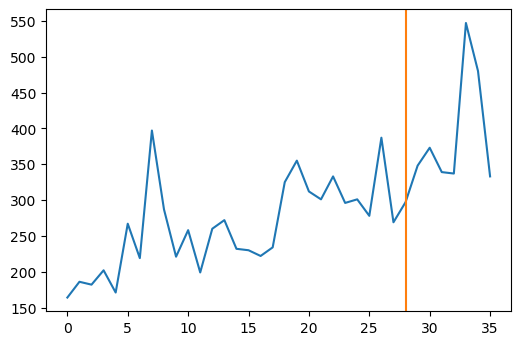

In [25]:
plt.plot([len(search(i,['fee ','fees'])) for i in metadata[0]])
plt.axvline(28, 0, 2, label='pyplot vertical line',color='C1')

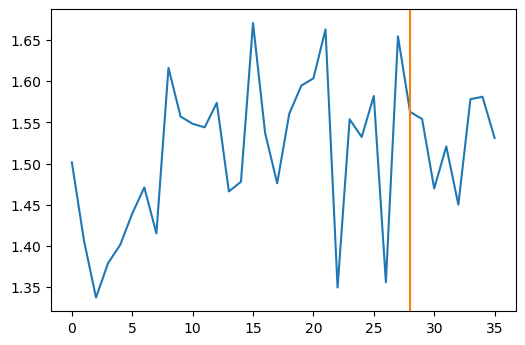

In [26]:
plt.plot([replymean(search(i,['fee ','fees'])) for i in metadata[0]])
plt.axvline(28,label='pyplot vertical line',color='C1')

In [27]:
np.random.seed(123)
np.random.choice(text(search(metadata[0][-8],['fee ','fees'])),30)

297


array(['I done turned  now Bank of America removing my monthly maintenance fee waiverbullshit ',
       'Wells Fargo Kept Charging Overdraft Fees Despite Closing Customers Accounts ',
       'AskWellsFargo Opened an account with Wells Fargo and before my first bill I paid against the existing balance I then was charged with a late fee for what should have been first payment What gives Why does the app indicate customer x and when i call offices are closed ',
       'Gotta love when Wells Fargo screws you over Deposited my check in the morning and got told that I wont be seeing the deposit until tomorrow morning Ive never had to wait a whole day to get funds from any of my past checks And I just got overdrawn from a toll fee great',
       'I hear you I think those other Banks value your relationship more Its all banks is a lazy answer people say To me its all about how they shine or dont when you have an issue needing help with something I worked as a manager for Bofa and fees is the m

In [28]:
text(search(metadata[0][-3],['fee ','fees'])) # overdraft fee

547


[' BankofAmerica will always charge fees they dont care  dollars  dollar fee I called and was denied a refund Rep said BOA doesnt refund tedlieu AOC SenWarren tedcruz BOAEvil realDonaldTrump',
 ' FEES ON A SECURED CARD IS HIGHWAY ROBBERY',
 ' He makes  million benefits  Because thats how petty they are I was fired from BofA over a loss of  a loss that was a monthly fee they erroneously charged a customer',
 ' Its much worse Im gonna speak out as a former manager for them that they need to have a moratorium on monthly fees',
 ' Like people just dont know theres an alternative to Chase and Wells Fargo and Bank of America but by the time they come around to credit unions and local banks theyve already had their banking history destroyed by the extortionate fees and penalties',
 ' Pause interest rate charges on credit card balances and stop levying late fees for at least the next three months BankofAmerica Chase CapitalOne WellsFargo federalreserve ',
 ' There are a whole host of issues li

In [29]:
np.random.seed(123)
np.random.choice(text(search(metadata[0][26],['fee ','fees'])),30)

387


array(['ewarren They and Ocwen charged us k plus in bogus foreclosure fees that AHMSI started Homeward continued and Ocwen perpetuated for  years The new crooked co PHH is refusing to take fees off even when OCN promised they would research account and write a report back',
       'they charged me a  overdraft fee because i was overdrawn  BUT i had deposited money in my acct the day before so i shouldnt have been overdrawn at all i refused to pay switched to us bank best decision ive made in awhile',
       'WellsFargo has a corporate lawyer as there in term CEO If you have to have a lawyer run your company you know the end is coming soon WellsFargo makes no money because there are spending billions with a B in legal fees thats not winning thats losing your ass',
       'Chase Do you guys reimburse ATM fees BankofAmerica does and Im curious if you are as well Trying to decide which bank to go with',
       'OMG really so they charged you a balance transfer fee How the hell Ugh',
      

In [30]:
result=[]
for i in range(4):
    result.append(len(search(lsum(metadata[i][28:31]),['commission','commissions']))/len(lsum(metadata[i][25:31])))
print(result)

[0.0007209538774378408, 0.036797666840693466, 0.0011435908753485945, 0.001064018442986345]


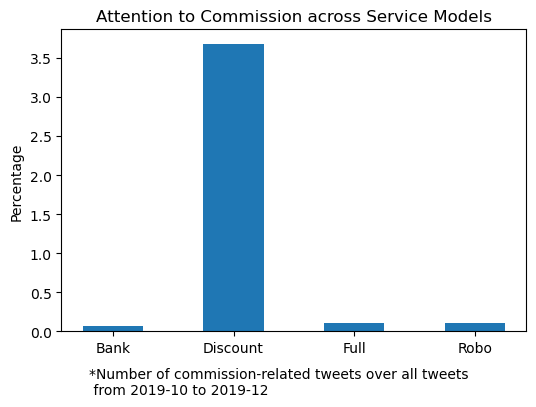

In [31]:
matplotlib.rcParams['figure.dpi']=100
plt.bar(['Bank','Discount','Full','Robo'],100*np.array(result),width=0.5)
plt.title('Attention to Commission across Service Models')
plt.ylabel('Percentage')
plt.text(-0.2,-0.8,'*Number of commission-related tweets over all tweets\n from 2019-10 to 2019-12')
plt.show()

In [50]:
100*np.array(result)

array([0.07209539, 3.67976668, 0.11435909, 0.10640184])

In [32]:
text(search(lsum(metadata[2]),['advisory fee']))

8


['A very disturbing no brainer And they use Govt Bonds as a Risk Free Rate Scarily riskfree rate mi gives a wing a hope of capital growth through  The Goldman Sachs school of Central Banking I guess it helps bring more advisory fees through Buy backs Corporate Actions',
 'Before we even take this loan say  billion it will balloon to  billion because of hedging currency riskadd dollar based interestAnd Goldman sachs and co transaction advisory fees',
 'BristolMyers BMY disclosed that it will pay a total of  mil in advisory fees to Morgan Stanley  mil Evercore  mil Dyal Co  mil for advising on its  bil acqstn of Celgene CELG the  mil acquirer side total fee is the largest we have recorded ',
 'Morgan Stanley leapt  after its earnings beat analysts forecasts driven by strong trading revenue and advisory fees while Netflix jumped  after a strong rise in international subscribers to the video streaming service offset a shortfall in domestic subscriber estimates',
 'Nice but deal making seem

In [33]:
for i in range(4):
    print(round(replymean(lsum(metadata[i][28:30])),3),round(replymean(lsum(metadata[i][25:28])),3))

1.573 1.544
1.563 1.572
1.546 1.48
1.741 1.679


In [34]:
replymean(lsum(metadata[1][25:28]))

1.5719362638002854

In [35]:
text(search(lsum(metadata[0]),['fee']))

17013


['  Having some BulletProof Coffee  Chugging down a Green Smoothie  Meditating in MTA  Hitting the Gym  Delivering Some epic code jpmorgan  Take care of business after hours',
 '  OFF SITEWIDE CODE NY E New Yorks th Congressional District NY govtrack uscongressman New Yorks th CongressionalRecordpearlfeet to my WellsFargo',
 '  Part  Which of these is more stable than crypto prices e JP Morgans acceptance of Bitcoin f The strength of Starbucks coffee g Harvey Weinsteins marriage h The freshness of MacDonalds fries',
 '  SERVICE fee For NOT using their service enough Admittedly Im conflicted as a JPM shareholder And who uses cash or debit cards I thought those were only the things of legend',
 '  WellsFargo will be waiving all fees on remittances to help workers support family abroad',
 '  am pm M off T keefecoffee Courtesyproducts  Linpage Pl  W WellsFargo Th Corporate Hill  Des Peres Rd Th Eve St Ann Party In the Park pm pm F EdwardJones North for Charity Lunch Go Gyro ',
 '  bucks to

In [36]:
text(andsearch(lsum(metadata[0]),['fee','overdraft']))

2025


[' Bank of America with their  overdraft fee i already have no money why are you charging me for not having money ',
 ' BankofAmerica overdraft fees This has to be how yall make your money ',
 ' BankofAmerica s high ass overdraft fee and broken atms all over town',
 ' I wont go into how in April their overdraft fees ate up ALL my refund money ',
 ' No Im actually thinking of putting you and your fellow money cartel members out of business for good because you and your memberbank cartels led by Jamie Dimons JP Morgan Chase charged the poorest Americans  billion in overdraft fees last ',
 ' Overdraft fees',
 ' SenWarren wants WellsFargo to disclose much money the bank has collected over the past five years charging overdraft fees on empty accounts past the dates on which accounts were supposedly closed ',
 ' Wells Fargo Blindsides Customers By Charging Thousands In Overdraft Fees On Closed Accounts',
 ' Wells Fargo Blindsides Customers By Charging Thousands In Overdraft Fees On Closed Ac

In [37]:
text(search(lsum(metadata[2]),['fee']))

4087


['  Goldman Sachs Feels Some Cryptocurrencies Will Eventually Become Real Money BTC ',
 '  of Millennials are concerned about defaulting on a loan in the next  months Source UBS DO NOT TAKE OUT A LOAN WITH OUT PLAN IN PLACE TO PAY IT BACK If you have any questions or need help feel free to contact us',
 ' A Hall of Mirrors in Monetary Policy Chart suggesting a feedback loop between bond market pricing central bank decisions ht GoldmanSachs ',
 ' Active funds steal  annual Cant get paid like that w passive HNW investors likewise defrauded by our nobodyeverseesthefees billing Every client at UBS MorganStnly JP Morgan etc is a rube They own stuff like FundofFunds hidden  fees',
 ' An Amazontype marketplace could cut fees in half businessinsider MorganStanley OliverWyman JimMarous rshevlin leimer psbdc DianeKazarian Stevewal DBaker ',
 ' And the biggest PAC shes taken from is Emilys List IIRC which has a different agenda than Goldman Sachs or something It seems like in my opinion she just 

In [38]:
def search(data,keywords):
    result=[]
    for i in data:
        for j in keywords:
            if j in i['text'].lower().split():
                result.append(i)
                break
    return result

def andsearch2(data,keywords):
    temp=data
    for i in keywords:
        temp=search(temp,i)
    return temp

In [39]:
text(search(lsum(metadata[0]),['fee','fees']))

10077


['  SERVICE fee For NOT using their service enough Admittedly Im conflicted as a JPM shareholder And who uses cash or debit cards I thought those were only the things of legend',
 '  WellsFargo will be waiving all fees on remittances to help workers support family abroad',
 '  bucks to cash a payroll check written off a Bank of America corporate account But if I open an account with you I wont pay  dollars to cash a check from your bank If thats the unreasonable fees you charge for that I can only assume youre fees r unreasonable',
 ' A inadvertent bank to bank payment selection is now leaving me with  in transaction fees because BOFA cant stop the transmission which is so ridiculous I left BofA years ago due to their predatory practices but came back for a Alaska card Wow do I regret it',
 ' AM BloombergTV s elfin British anchor interviewing an expert from  of the guests on these  horseshit networks are employed by an investment fund company that would quickly fail if its customers ev

In [40]:
text(andsearch2(lsum(metadata[0]),[['fee','fees'],['overdraft']]))

1914


[' Bank of America with their  overdraft fee i already have no money why are you charging me for not having money ',
 ' BankofAmerica overdraft fees This has to be how yall make your money ',
 ' BankofAmerica s high ass overdraft fee and broken atms all over town',
 ' I wont go into how in April their overdraft fees ate up ALL my refund money ',
 ' No Im actually thinking of putting you and your fellow money cartel members out of business for good because you and your memberbank cartels led by Jamie Dimons JP Morgan Chase charged the poorest Americans  billion in overdraft fees last ',
 ' Overdraft fees',
 ' SenWarren wants WellsFargo to disclose much money the bank has collected over the past five years charging overdraft fees on empty accounts past the dates on which accounts were supposedly closed ',
 ' Wells Fargo Blindsides Customers By Charging Thousands In Overdraft Fees On Closed Accounts',
 ' Wells Fargo Blindsides Customers By Charging Thousands In Overdraft Fees On Closed Ac

In [41]:
text(search(lsum(metadata[3]),['fee','fees']))

620


[' Action of the Week Find Your Fees ',
 ' Barrons article on Robo Advisors We find the quote below very meaningful Register today Meanwhile as standalone robos have matured they have turned to humans for help In January Betterment began offering human advice for a higher fee ',
 ' Best Low Fee Robo Advisors  Ones If youre ready to turn over your investment management to a pro so you have more time for living then check out these digital financial advisors MFinance betterment ',
 ' Best Low Fee Robo Advisors  Ones If youre ready to turn over your investment management to a pro so you have more time for living then check out these digital financial advisors MFinance betterment ',
 ' Best Low Fee Robo Advisors  Ones If youre ready to turn over your investment management to a pro so you have more time for living then check out these digital financial advisors MFinance betterment ',
 ' Best Low Fee Robo Advisors  Ones If youre ready to turn over your investment management to a pro so you h

In [42]:
text(andsearch2(lsum(metadata[3]),[['fee','fees'],['low','lower']]))

107


[' Best Low Fee Robo Advisors  Ones If youre ready to turn over your investment management to a pro so you have more time for living then check out these digital financial advisors MFinance betterment ',
 ' Best Low Fee Robo Advisors  Ones If youre ready to turn over your investment management to a pro so you have more time for living then check out these digital financial advisors MFinance betterment ',
 ' Best Low Fee Robo Advisors  Ones If youre ready to turn over your investment management to a pro so you have more time for living then check out these digital financial advisors MFinance betterment ',
 ' Best Low Fee Robo Advisors  Ones If youre ready to turn over your investment management to a pro so you have more time for living then check out these digital financial advisors MFinance betterment ',
 ' pushes people into investments that make no sense Why do I have to invest a minimum amount in bonds A whopping  total return in  years  per year and they will not let me move this t

In [43]:
text(andsearch2(lsum(metadata[3]),[['fee','fees'],['high','higher']]))

72


[' Barrons article on Robo Advisors We find the quote below very meaningful Register today Meanwhile as standalone robos have matured they have turned to humans for help In January Betterment began offering human advice for a higher fee ',
 ' exclusive of GSTSTT etc To put it in context heres fees of the biggies Betterment Wealthfront  higher for human interaction StashAway  WealthSimple  Of course anyone can DIY for free We put it up as neat little bullet points on that page itself ',
 'Adam you guys were relentless trashing higher fee active funds Now you say a move to higher fee active is good The optics are VERY bad here',
 'Agreed I tried Wells Fargos robo when they came out just out of curiosity Nothing special and not any better returns than Betterment or WealthFront but higher fees',
 'Also their advisory fee seems to be on the high end It is a bit ironic that they have a wizard that analyzes fees on funds but then they charge you so much',
 'And makes Ellevest which puts women

In [49]:
len(search(lsum(metadata[1]),['fee','fees','commission']))

8264

In [48]:
len(search(lsum(metadata[1]),['commission']))

2629

In [52]:
len(lsum(metadata[0][-14:-8]))

17166.166666666668

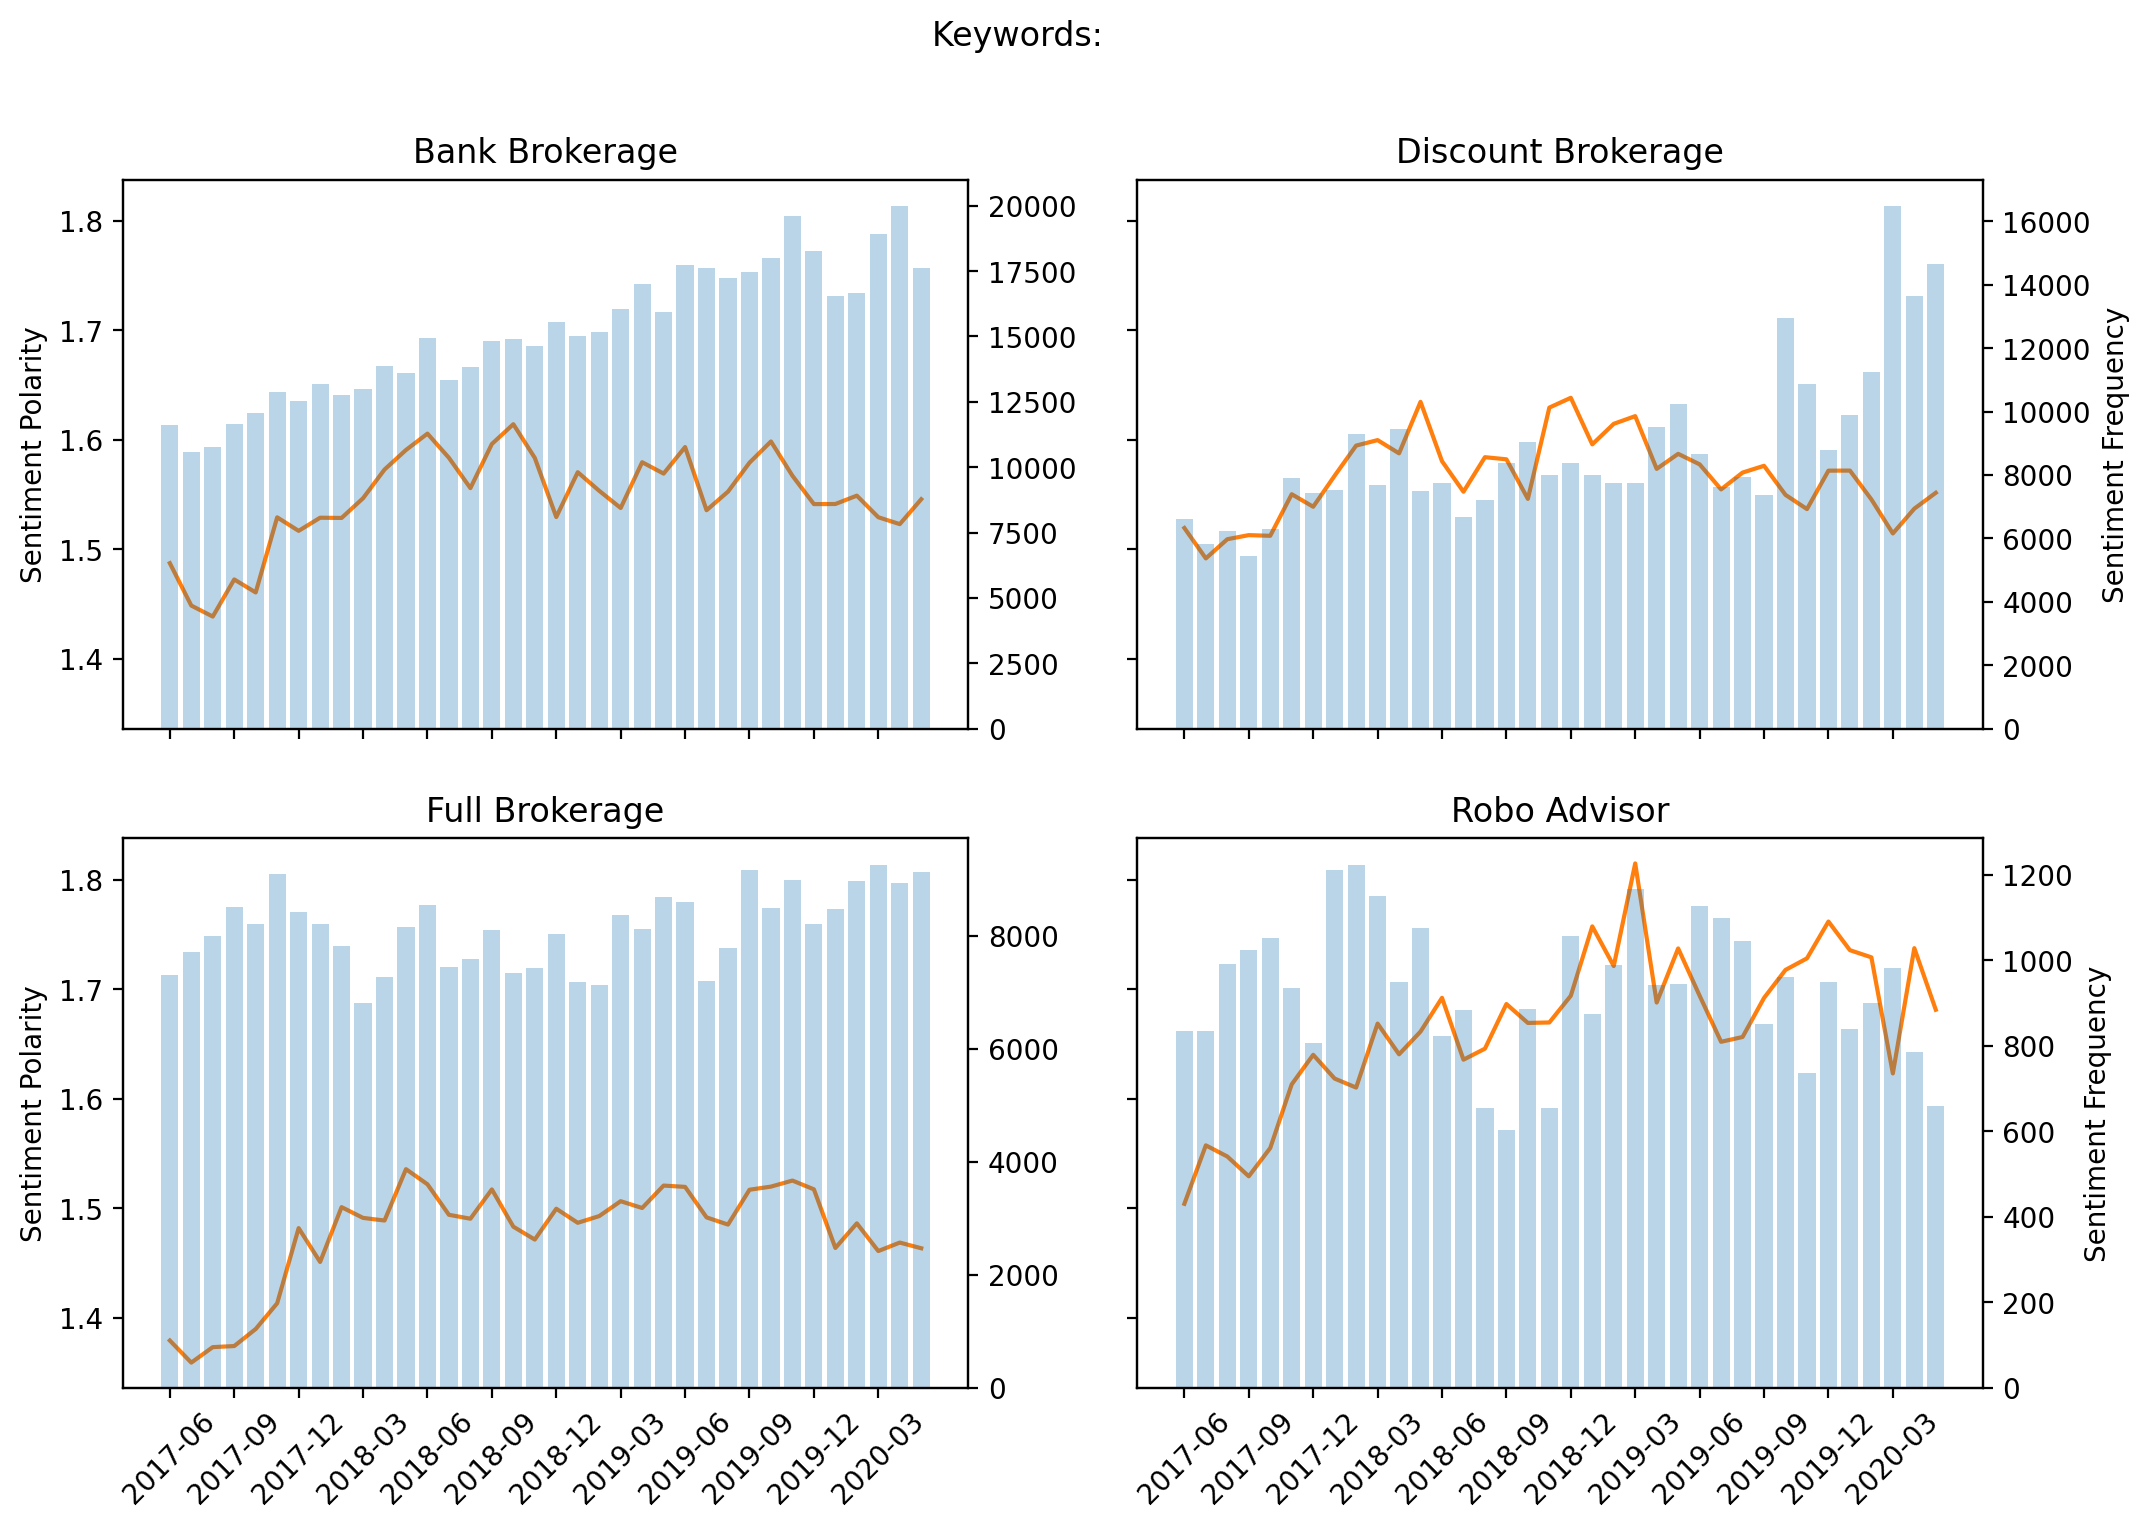

In [53]:
all_trend(metadata,0,[''])

In [54]:
def retweetmean(data):
    total=len(data)
    cnt=0
    score=0
    for i in data:
        cnt+=1+i['retweets']
        score+=(1+i['retweets'])*i['positive']
    return score/max(1,cnt)

In [57]:
temp=np.array([[len(i) for i in j] for j in metadata])

In [60]:
(temp-np.mean(temp,axis=0))/np.std(temp,axis=0)

array([[ 1.30880498e+00,  1.22138752e+00,  1.19699308e+00,
         1.27179744e+00,  1.30166837e+00,  1.19982132e+00,
         1.24577575e+00,  1.32815903e+00,  1.18923131e+00,
         1.38737746e+00,  1.28395418e+00,  1.35510060e+00,
         1.38595869e+00,  1.41714119e+00,  1.39587903e+00,
         1.35939420e+00,  1.37249144e+00,  1.40583299e+00,
         1.42376843e+00,  1.44663987e+00,  1.47385528e+00,
         1.46369494e+00,  1.42226703e+00,  1.30393391e+00,
         1.47888662e+00,  1.55870944e+00,  1.51707895e+00,
         1.47773891e+00,  1.26091630e+00,  1.42455541e+00,
         1.49778832e+00,  1.36330260e+00,  1.27234318e+00,
         1.07245233e+00,  1.30573234e+00,  1.09871880e+00],
       [ 8.79967487e-03, -1.12215022e-01, -7.39317197e-02,
        -3.07381334e-01, -1.55504873e-01,  4.55745636e-02,
         3.15716797e-02,  2.94191962e-04,  3.64850618e-01,
         1.27968367e-01,  3.38080545e-01, -1.90922698e-02,
        -5.36403473e-02, -9.23298406e-02, -2.24873434e-

In [61]:
result=((temp-np.mean(temp,axis=0))/np.std(temp,axis=0))

In [85]:
result[:,-9]

array([ 1.47773891, -0.2273769 ,  0.07584855, -1.32621056])

In [86]:
result[:,-8]

array([ 1.2609163 ,  0.45723342, -0.25699162, -1.4611581 ])

In [70]:
for i in range(4):
    print(retweetmean(lsum(metadata[i][-10:-8])))

1.5022112966954022
1.6026242927651377
1.4635599513907642
1.6278525453481567


In [71]:
for i in range(4):
    print(retweetmean(lsum(metadata[i][-8:-6])))

1.5571388108155217
1.635263504963553
1.6004272390975878
1.6820276497695852


In [79]:
a=np.array([retweetmean(search(lsum(metadata[i][-10:-8]),['fee','commission'])) for i in range(4)])
b=np.array([retweetmean(search(lsum(metadata[i][-8:-6]),['fee','commission'])) for i in range(4)])

In [80]:
a-1

array([0.55182927, 0.50519031, 0.25233645, 0.75      ])

In [81]:
b-1

array([0.57232704, 0.59166191, 0.52941176, 0.625     ])

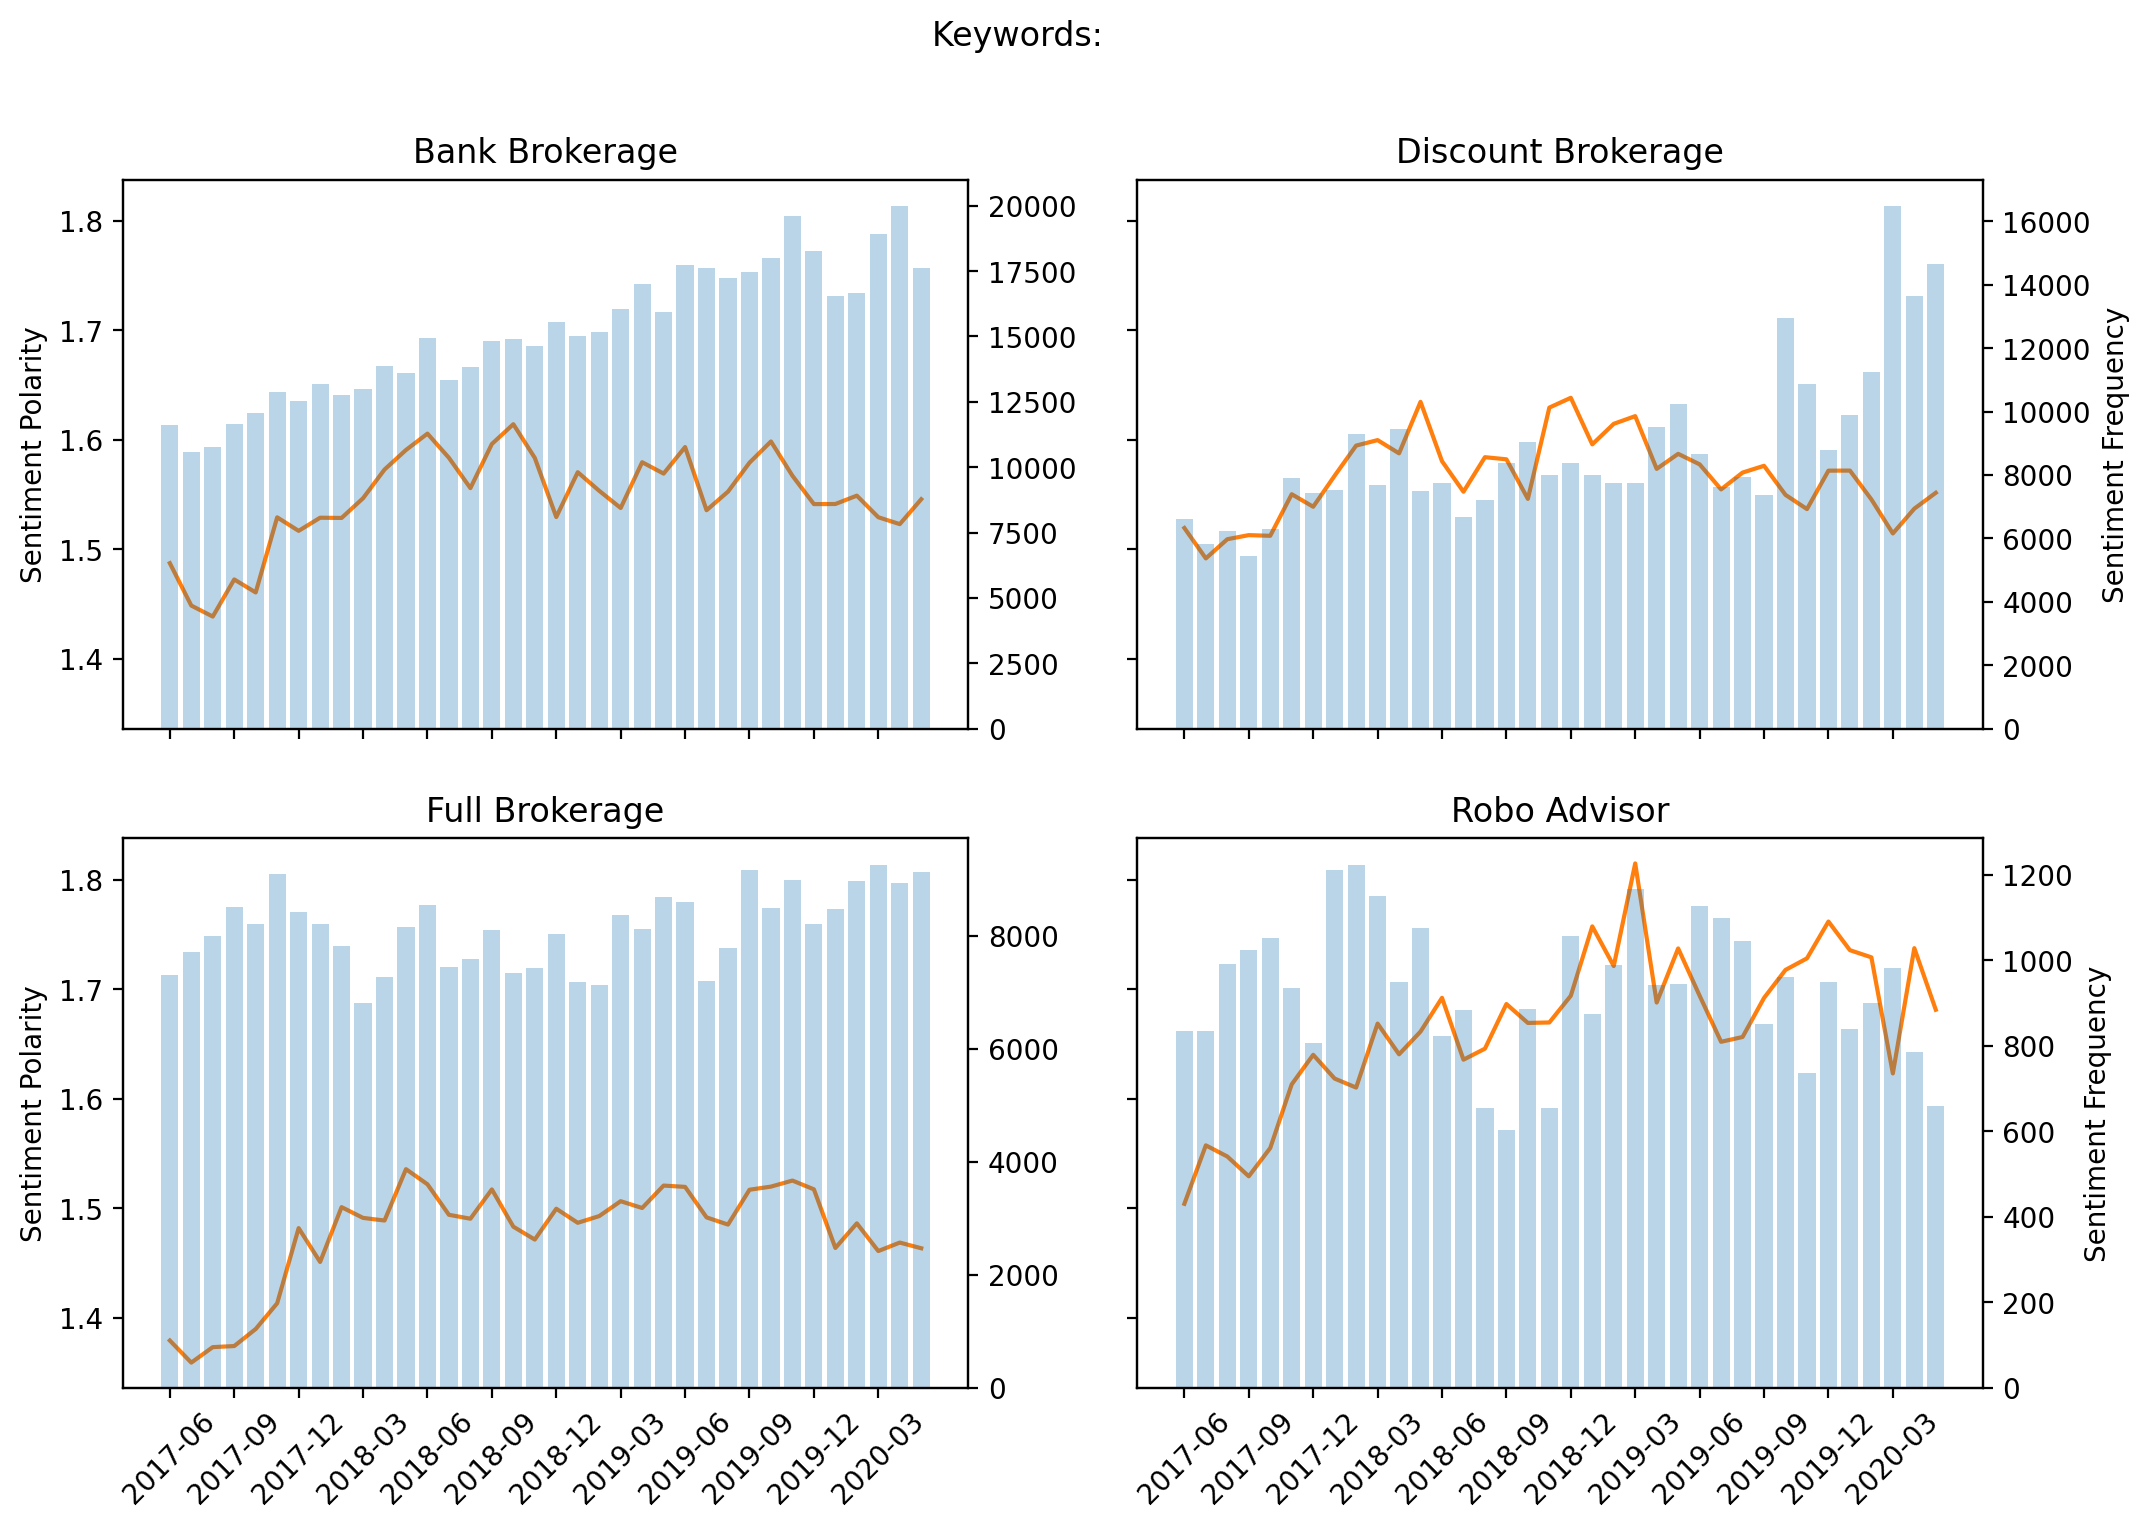

In [84]:
all_trend(metadata,0)

In [92]:
a=np.array([len(lsum(i[-10:-8])) for i in metadata])

In [93]:
b=np.array([len(lsum(i[-8:-6])) for i in metadata])

In [94]:
b/a-1

array([ 0.08286052,  0.55769733,  0.03276656, -0.10548523])